The analysis is done with Apache Spark interface PySpark and MLlibs(Machine Learning Libraries).

Financial datasets are important to many researchers in the domain of fraud detection.

The aim is to propose a generalized model that could help solve real world problems with appropriate Machine Learning tools.


**What are the key factors that predict fraudulent customer?**

The key factors that predict the fraudulent customers:

The introduction of technology has caused a significant shift in the financial sector throughout time. The most obvious change has been in the way we now perceive money transactions. In recent years, the market for digital payments has grown astronomically.

1. Inappropriate transcation records.
2. Strange or suspicious activity on your account.
3. False/manipulative data regarding your transactions.
4. Pattern in fraud and theft etc.


The following provide the biggest obstacle for businesses wanting to fully secure their payment systems:


1. Acquiring top-notch instruments to reduce payment risk and enhance experiences.
2. Obtaining qualified personnel who can improve payment methods and assist with fraud detection.

**Some of the benefits of fraud detection using machine learning are:**



*  Higher Accuracy
*  Rapid & Effective Detection
*  Better prediction with huge datasets
*   Cost-effective techniques







*   These factors make complete sense. Predictive analysis is the active area of research.
*   With the help of state-of-the-art ML/AI techniques there are a lot of opportunities in various domains to develop and create as it rapidly and robustly developing. Machine Learning and Artificial Intelligence is the future.

**How?**

From forecasting consumer behaviour to developing the operating system for self-driving cars, machine learning has been put to use in a variety of applications.

When it comes to benefits, machine learning may aid businesses in better comprehending their clients. Machine learning algorithms may discover correlations and assist teams in customising product development and marketing campaigns to consumer demand by gathering customer data and comparing it with actions over time.

Some businesses base their business models primarily on machine learning. For instance, Uber matches drivers with riders using algorithms. Google surfaces the ride adverts in searches using machine learning.

The following deals with the real-word problem fraud detection analysis.

Import all the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import pyspark
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
np.random.seed(2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setting up PySpark.

Build a Spark Session.

In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('frauddetect').getOrCreate()

In [ ]:
spark

In [ ]:
spark.version

'3.3.0'

Import dataset.

In [ ]:
df_pyspark=spark.read.csv('Fraud.csv',header=True)

In [ ]:
df_pyspark

DataFrame[step: string, type: string, amount: string, nameOrig: string, oldbalanceOrg: string, newbalanceOrig: string, nameDest: string, oldbalanceDest: string, newbalanceDest: string, isFraud: string, isFlaggedFraud: string]

In [ ]:
df_pyspark.show()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|   amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT|  9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|    181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|    181.0| C840083671|        181.0|           0.0|  C38997010|       21182.0|           0.0|      1|             0|
|   1| PAYMENT| 11668.14|C2048537720|      41554.0|      29885.86|M123070170

In [ ]:
df_pyspark=spark.read.option('header','true').csv('Fraud.csv')

In [ ]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [ ]:
df_pyspark.head()

Row(step='1', type='PAYMENT', amount='9839.64', nameOrig='C1231006815', oldbalanceOrg='170136.0', newbalanceOrig='160296.36', nameDest='M1979787155', oldbalanceDest='0.0', newbalanceDest='0.0', isFraud='0', isFlaggedFraud='0')

##Data Preprocessing and Data Cleaning

In [ ]:
#checking the schema(datatype)
df_pyspark.printSchema

<bound method DataFrame.printSchema of DataFrame[step: string, type: string, amount: string, nameOrig: string, oldbalanceOrg: string, newbalanceOrig: string, nameDest: string, oldbalanceDest: string, newbalanceDest: string, isFraud: string, isFlaggedFraud: string]>

In [ ]:
#as we can see above the values are of string type by default.
#changing the string datatype to their respective datatypes.
df_pyspark=spark.read.option('header','true').csv('Fraud.csv',inferSchema=True)

In [ ]:
df_pyspark.printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- nameDest: string (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)



In [ ]:
df_pyspark.describe().show()

+-------+------------------+--------+-----------------+-----------+------------------+------------------+-----------+-----------------+------------------+--------------------+--------------+
|summary|              step|    type|           amount|   nameOrig|     oldbalanceOrg|    newbalanceOrig|   nameDest|   oldbalanceDest|    newbalanceDest|             isFraud|isFlaggedFraud|
+-------+------------------+--------+-----------------+-----------+------------------+------------------+-----------+-----------------+------------------+--------------------+--------------+
|  count|           1159457| 1159457|          1159456|    1159456|           1159456|           1159456|    1159456|          1159456|           1159456|             1159456|       1159456|
|   mean| 36.41006609128238|    null|161059.9053645463|       null| 875410.2892406515| 895322.0831663524|       null|979690.8354073755|1113925.3970056383|0.001300609941213...|           0.0|
| stddev|32.781043711561885|    null|274416.7

In [ ]:
df_pyspark.count()

1159457

In [ ]:
df_pyspark.na.drop().show()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|   amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT|  9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|    181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|    181.0| C840083671|        181.0|           0.0|  C38997010|       21182.0|           0.0|      1|             0|
|   1| PAYMENT| 11668.14|C2048537720|      41554.0|      29885.86|M123070170

In [ ]:
df_pyspark.head()

Row(step=1, type='PAYMENT', amount=9839.64, nameOrig='C1231006815', oldbalanceOrg=170136.0, newbalanceOrig=160296.36, nameDest='M1979787155', oldbalanceDest=0.0, newbalanceDest=0.0, isFraud=0, isFlaggedFraud=0)

In [ ]:
df_pyspark.na.drop().show()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|   amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT|  9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|    181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|    181.0| C840083671|        181.0|           0.0|  C38997010|       21182.0|           0.0|      1|             0|
|   1| PAYMENT| 11668.14|C2048537720|      41554.0|      29885.86|M123070170

In [ ]:
#any value that is null will get dropped
df_pyspark.na.drop(how="any").show()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|   amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT|  9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|    181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|    181.0| C840083671|        181.0|           0.0|  C38997010|       21182.0|           0.0|      1|             0|
|   1| PAYMENT| 11668.14|C2048537720|      41554.0|      29885.86|M123070170

In [ ]:
df_pyspark.groupBy('isFraud').count().show()

+-------+-------+
|isFraud|  count|
+-------+-------+
|      1|   1508|
|      0|1157948|
|   null|      1|
+-------+-------+



findings: The data is imbalanced.

In [ ]:
#checking for missing values
from pyspark.sql.functions import col,sum
df_pyspark.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df_pyspark.columns)).show()

+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|step|type|amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|   0|   0|     1|       1|            1|             1|       1|             1|             1|      1|             1|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+



In [ ]:
#replacing the na values with missing values
df_pyspark.na.fill('Missing values').show()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|   amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT|  9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|    181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1|CASH_OUT|    181.0| C840083671|        181.0|           0.0|  C38997010|       21182.0|           0.0|      1|             0|
|   1| PAYMENT| 11668.14|C2048537720|      41554.0|      29885.86|M123070170

In [ ]:
#checking redundancy in the data.
print(df_pyspark.dropDuplicates())


DataFrame[step: int, type: string, amount: double, nameOrig: string, oldbalanceOrg: double, newbalanceOrig: double, nameDest: string, oldbalanceDest: double, newbalanceDest: double, isFraud: int, isFlaggedFraud: int]


In [ ]:
#finding the fraudulent data
fd = df_pyspark.filter(df_pyspark['isFraud'] == 1).groupby('type').count().show()

+--------+-----+
|    type|count|
+--------+-----+
|TRANSFER|  747|
|CASH_OUT|  761|
+--------+-----+



findings: The fraudulent data can be found in the TRANSFER and CASH_OUT types.

In [ ]:
#given that an illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
df_pyspark.filter(df_pyspark['isFlaggedFraud'] == 1).orderBy('amount').show()

+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|step|type|amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+



findings: Don't have any records with such transactions.

In [ ]:
df_pyspark.filter(df_pyspark['isFlaggedFraud'] == 1).orderBy('amount').show()

+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|step|type|amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
+----+----+------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+



In [ ]:
#taking the min and max values when it's flagged as fraud
max1 = df_pyspark.filter(df_pyspark['isFlaggedFraud'] == 1).agg({"amount": "mean"}).collect()[0]
min1 = df_pyspark.filter(df_pyspark['isFlaggedFraud'] == 1).agg({"amount": "min"}).collect()[0]

In [ ]:
df_pyspark.groupBy(['isFlaggedFraud']).agg({'amount':'avg','isFlaggedFraud':'count'}).show()

+--------------+-----------------+---------------------+
|isFlaggedFraud|      avg(amount)|count(isFlaggedFraud)|
+--------------+-----------------+---------------------+
|             0|161059.9053645463|              1159456|
|          null|             null|                    0|
+--------------+-----------------+---------------------+



In [ ]:
from pyspark.sql.functions import mean, sum, max, col,count
groupBy = ["isFlaggedFraud"]
aggregate = ["amount"] 
fcts = [mean, sum, max,count]
exprs = [f(col(c)) for f in fcts for c in aggregate]

In [ ]:
values = df_pyspark.groupby(*groupBy).agg(*exprs).collect()

In [ ]:
values

[Row(isFlaggedFraud=0, avg(amount)=161059.9053645463, sum(amount)=186741873634.3554, max(amount)=10000000.0, count(amount)=1159456),
 Row(isFlaggedFraud=None, avg(amount)=None, sum(amount)=None, max(amount)=None, count(amount)=0)]

In [ ]:
max_val = df_pyspark.filter(df_pyspark['isFlaggedFraud'] == 0).agg({"amount": "max"}).collect()[0]
min_val = df_pyspark.filter(df_pyspark['isFlaggedFraud'] == 0).agg({"amount": "min"}).collect()[0]

In [ ]:
#When it's flagged as fraud the before and after transactions will be always zero.
max1[0],min1[0],max_val[0],min_val[0]

(None, None, 10000000.0, 0.1)

In [ ]:
df_pyspark.filter( (df_pyspark['isFlaggedFraud'] == 0) & (df_pyspark['oldbalanceDest'] ==0) & (df_pyspark['newbalanceDest'] ==0)).show(5)

+----+--------+--------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|  amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+--------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1| PAYMENT| 9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1| PAYMENT| 1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
|   1|TRANSFER|   181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1| PAYMENT|11668.14|C2048537720|      41554.0|      29885.86|M1230701703|           0.0|           0.0|      0|             0|
|   1| PAYMENT| 7817.71|  C90045638|      53860.0|      46042.29| M573487274|      

In [ ]:
#finding the genuinity of the names.
#finding if they're duplicated when flagged as fraud.
df_pyspark.filter(df_pyspark['isFlaggedFraud'] == 1).groupBy('nameOrig').count().show()

+--------+-----+
|nameOrig|count|
+--------+-----+
+--------+-----+



In [ ]:
df_pyspark.filter(df_pyspark['isFlaggedFraud'] == 1).groupBy('nameDest').count().show()

+--------+-----+
|nameDest|count|
+--------+-----+
+--------+-----+



In [ ]:
#finding the names of fraud and not fraud
df1 = df_pyspark.filter(df_pyspark['isFraud'] == 1) 
df0 = df_pyspark.filter(df_pyspark['isFraud'] == 0) 

In [ ]:
unique_org_names1 = [i.nameOrig for i in df1.select('nameOrig').distinct().collect()]
unique_org_names0 = [i.nameOrig for i in df0.select('nameOrig').distinct().collect()]

In [ ]:
#using the Imputer function
#Imputer function helps in completing the missing values in the data 
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=['amount','oldbalanceOrg','newbalanceOrig'],
                outputCols=["{}_imputed".format(c) for c in ['amount','oldbalanceOrg','newbalanceOrig']]).setStrategy("mean")

In [ ]:
df_pyspark=spark.read.option('header','true').csv('Fraud.csv',inferSchema=True)
#any null values will be replaced by the mean values.
imputer.fit(df_pyspark).transform(df_pyspark).show()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+--------------+---------------------+----------------------+
|step|    type|   amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|amount_imputed|oldbalanceOrg_imputed|newbalanceOrig_imputed|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+--------------+---------------------+----------------------+
|   1| PAYMENT|  9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|       9839.64|             170136.0|             160296.36|
|   1| PAYMENT|  1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|       1864.28|              21249.0|              19384.72|
|   1|TRANSFER|    181.0|C1305486145|   

In [ ]:
#gives the mean of the initial balance recipient before the transaction.
df_pyspark.groupBy('type').mean('oldbalanceDest').show()

+--------+-------------------+
|    type|avg(oldbalanceDest)|
+--------+-------------------+
|TRANSFER| 1993074.4276441624|
| CASH_IN|   1455871.69861586|
|CASH_OUT|  1384912.218745006|
| PAYMENT|                0.0|
|   DEBIT| 1275094.0069058593|
|       C|               null|
+--------+-------------------+



In [ ]:
#gives the mean of the new balance recipient after the transaction
df_pyspark.groupBy('type').mean('newbalanceDest').show()

+--------+-------------------+
|    type|avg(newbalanceDest)|
+--------+-------------------+
|TRANSFER|  2733253.701918805|
| CASH_IN| 1378940.3889548683|
|CASH_OUT|  1637062.532614424|
| PAYMENT|                0.0|
|   DEBIT| 1336940.4592339233|
|       C|               null|
+--------+-------------------+



In [ ]:
#gives the count of the type of transactions.
df_pyspark.groupBy('type').count().show()

+--------+------+
|    type| count|
+--------+------+
|TRANSFER| 96008|
| CASH_IN|251548|
|CASH_OUT|410194|
| PAYMENT|393665|
|   DEBIT|  8041|
|       C|     1|
+--------+------+



In [ ]:
df_pyspark=pd.read_csv('Fraud.csv')

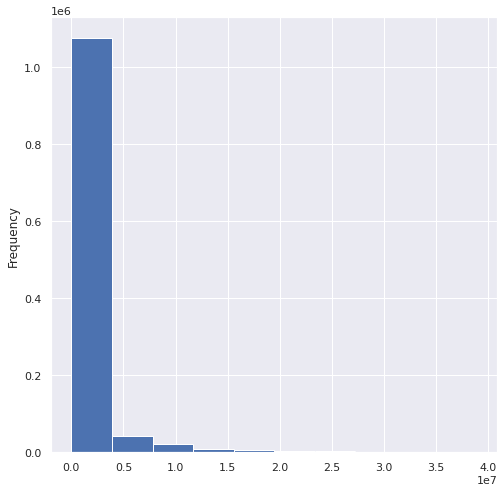

In [ ]:
df_pyspark['oldbalanceOrg'].plot(kind='hist')

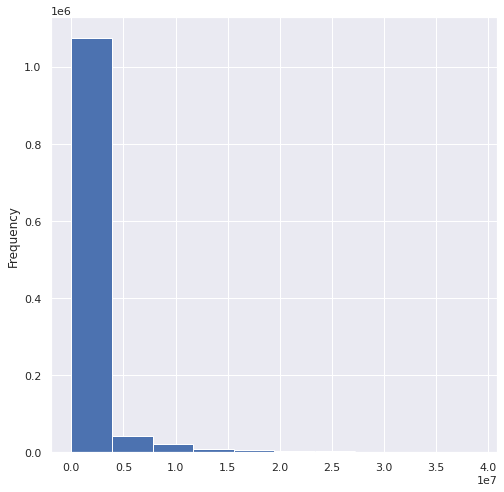

In [ ]:
df_pyspark['newbalanceOrig'].plot(kind='hist')

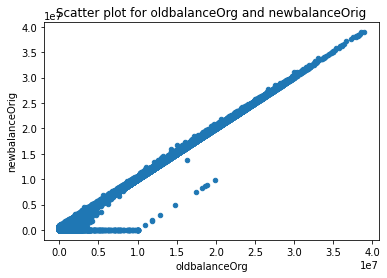

In [ ]:
df_pyspark.plot(kind='scatter', x='oldbalanceOrg', y='newbalanceOrig')
plt.title('Scatter plot for oldbalanceOrg and newbalanceOrig')
#plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


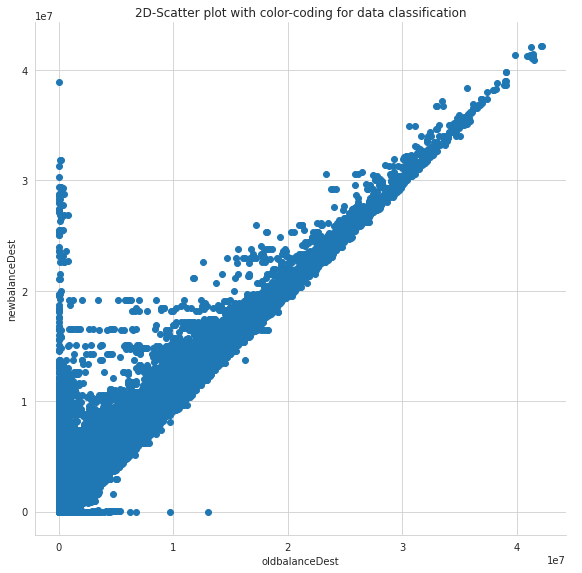

In [ ]:
#2D-Scatterplot 
sns.set_style("whitegrid");
sns.FacetGrid(df_pyspark,size=8) \
   .map(plt.scatter, "oldbalanceDest", "newbalanceDest") \
   .add_legend();
plt.title('2D-Scatter plot with color-coding for data classification')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


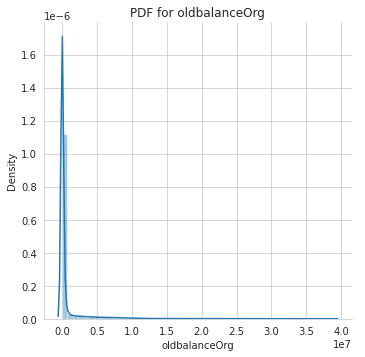

In [ ]:
#PDF oldbalanceOrg
#histogram
sns.FacetGrid(df_pyspark, size=5) \
   .map(sns.distplot, "oldbalanceOrg") \
   .add_legend();
plt.title('PDF for oldbalanceOrg')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


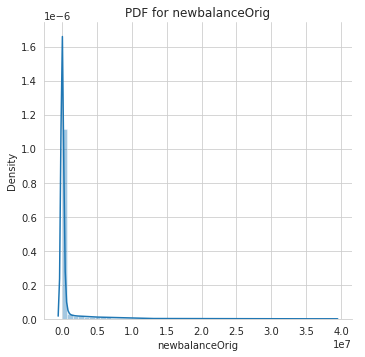

In [ ]:
#PDF newbalanceOrig
#histogram
sns.FacetGrid(df_pyspark, size=5) \
   .map(sns.distplot, "newbalanceOrig") \
   .add_legend();
plt.title('PDF for newbalanceOrig')
plt.show();

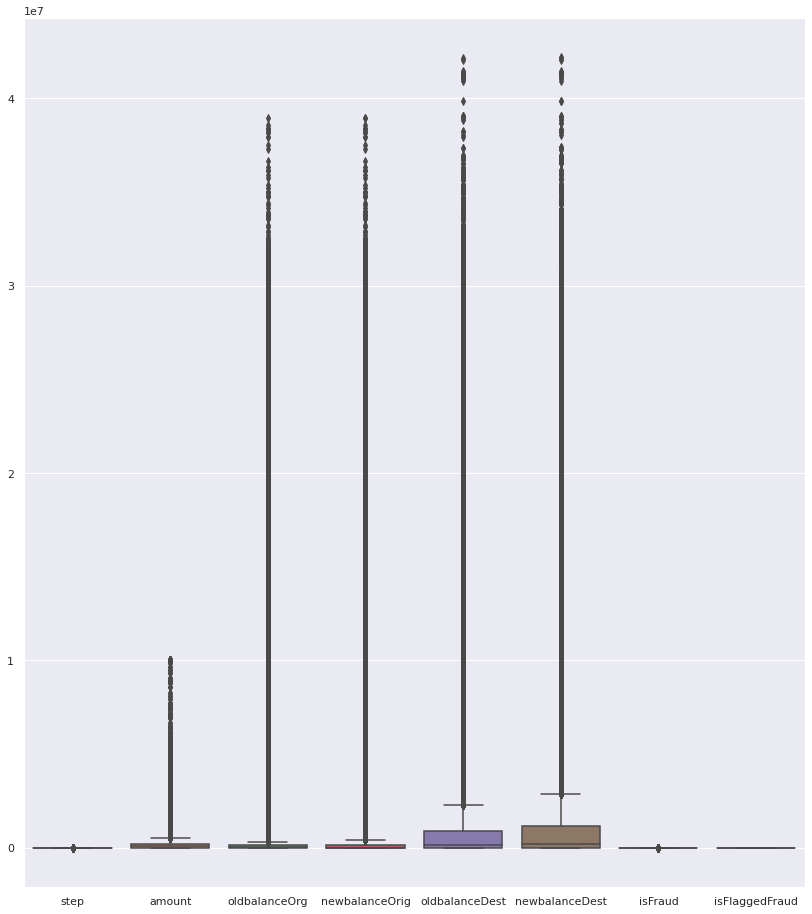

In [ ]:
#plotting box-plots to find outliers.
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_pyspark)
sns.set(rc={'figure.figsize':(14,18)})

In [ ]:
df_pyspark=spark.read.option('header','true').csv('Fraud.csv',inferSchema=True)

Train/Test Splitting 

In [ ]:
#df_pyspark=df_pyspark[["type","amount","oldbalanceOrg","newbalanceOrig","isFraud"]]

In [ ]:
df_pyspark.show(2)

+----+-------+-------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|   type| amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+-------+-------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1|PAYMENT|9839.64|C1231006815|     170136.0|     160296.36|M1979787155|           0.0|           0.0|      0|             0|
|   1|PAYMENT|1864.28|C1666544295|      21249.0|      19384.72|M2044282225|           0.0|           0.0|      0|             0|
+----+-------+-------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
only showing top 2 rows



In [ ]:
train, test=df_pyspark.randomSplit([0.7,0.3],seed=7)

In [ ]:
print(f"Train set length:{train.count()}records")
print(f"Test set length:{train.count()}records")

Train set length:811450records
Test set length:811450records


In [ ]:
train.show(2)

+----+-------+------+-----------+-------------+--------------+----------+--------------+--------------+-------+--------------+
|step|   type|amount|   nameOrig|oldbalanceOrg|newbalanceOrig|  nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+-------+------+-----------+-------------+--------------+----------+--------------+--------------+-------+--------------+
|   1|CASH_IN|270.78| C619985571|   4184966.65|    4185237.43|C875917495|        3019.0|           0.0|      0|             0|
|   1|CASH_IN|484.57|C1859216983|   5422437.76|    5422922.33|C657736958|    5638778.53|    5579568.65|      0|             0|
+----+-------+------+-----------+-------------+--------------+----------+--------------+--------------+-------+--------------+
only showing top 2 rows



In [ ]:
catcols=[x for (x,dataType) in train.dtypes if dataType=="string"]
numcols=[x for (x,dataType) in train.dtypes if (dataType=="double") & (x!="isFraud")]

In [ ]:
print(catcols)
print(numcols)

['type', 'nameOrig', 'nameDest']
['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


StandardScaler

Standardizing a set of features to have 0 mean and standard deviation of 1

In [ ]:
#assembling the vectors 
from pyspark.ml.feature import VectorAssembler, StandardScaler
vector_assembler=VectorAssembler(inputCols=numcols,outputCol="data")

In [ ]:
#transforming the train set
temp_train=vector_assembler.transform(train)

In [ ]:
#bringing together into a single vector
temp_train.select('data').show(2)

+--------------------+
|                data|
+--------------------+
|[270.78,4184966.6...|
|[484.57,5422437.7...|
+--------------------+
only showing top 2 rows



In [ ]:
temp_train.show(2,truncate=False)

+----+-------+------+-----------+-------------+--------------+----------+--------------+--------------+-------+--------------+----------------------------------------------------+
|step|type   |amount|nameOrig   |oldbalanceOrg|newbalanceOrig|nameDest  |oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|data                                                |
+----+-------+------+-----------+-------------+--------------+----------+--------------+--------------+-------+--------------+----------------------------------------------------+
|1   |CASH_IN|270.78|C619985571 |4184966.65   |4185237.43    |C875917495|3019.0        |0.0           |0      |0             |[270.78,4184966.65,4185237.43,3019.0,0.0]           |
|1   |CASH_IN|484.57|C1859216983|5422437.76   |5422922.33    |C657736958|5638778.53    |5579568.65    |0      |0             |[484.57,5422437.76,5422922.33,5638778.53,5579568.65]|
+----+-------+------+-----------+-------------+--------------+----------+--------------+------------

In [ ]:
#takes the input column and scales it
standard_scaler=StandardScaler(inputCol="data",outputCol="scaled")

In [ ]:
#train=standard_scaler.fit(temp_train).transform(temp_train)

In [ ]:
x0 = df_pyspark.filter(df_pyspark['type'].isin(['CASH_OUT','TRANSFER']))

In [ ]:
#changing 0 values to more sensible values for some cases.
from pyspark.sql.functions import when
import numpy as np

x0 = x0.withColumn('oldbalanceDest', \
              when((x0['oldbalanceDest'] == 0) & (x0['newbalanceDest'] ==0) & (x0['amount'] !=0), -1).otherwise(x0['oldbalanceDest']))

x0 = x0.withColumn('newbalanceDest', \
              when((x0['oldbalanceDest'] == 0) & (x0['newbalanceDest'] ==0) & (x0['amount'] !=0), -1).otherwise(x0['newbalanceDest']))

In [ ]:
##check if the replacement working
x0.agg({"oldbalanceDest": "min"}).collect()[0]

Row(min(oldbalanceDest)=-1.0)

Model Pipeline

A pipeline allows us to maintain the data flow of all the relevant transformations that are required to reach the end result.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
'''x0 is the data frame'''
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df_pyspark) for column in ['type'] ]

pipeline = Pipeline(stages=indexers)
x_r = pipeline.fit(df_pyspark).transform(df_pyspark)

In [ ]:
x_r.limit(5).toPandas()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_index
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,3.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1.0


In [ ]:
from pyspark.sql.types import IntegerType

In [ ]:
xx = x_r.withColumn('type_index',x_r['type_index'].cast(IntegerType()))
xx = xx.withColumn('isFraud',x_r['isFraud'].cast(IntegerType()))

In [ ]:
xx = xx.withColumnRenamed('isFraud','label')

In [ ]:
xx.limit(5).toPandas()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,label,isFlaggedFraud,type_index
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,3
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


In [ ]:
xf = xx.drop('type')

In [ ]:
xf.limit(5).toPandas()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,label,isFlaggedFraud,type_index
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,3
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


Feature Engineering

Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [ ]:
from pyspark.sql.functions import col

In [ ]:
xf = xf.withColumn("errorbalanceOrig", col("newbalanceOrig") + col("amount") - col("oldbalanceOrg"))

In [ ]:
xf = xf.withColumn("errorbalanceDest", col("oldbalanceDest") + col("amount") - col("newbalanceDest"))

In [ ]:
xf.limit(5).toPandas()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,label,isFlaggedFraud,type_index,errorbalanceOrig,errorbalanceDest
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0.0,9839.64
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0.0,1864.28
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,3,0.0,181.00
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,0.0,21363.00
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0.0,11668.14


In [ ]:
#df3 = df_pyspark.selectExpr("amount","oldbalanceOrg	","newbalanceOrig","cast(amount as float) amount","cast(oldbalanceOrg as float) oldbalanceOrg","cast(newbalanceOrig as float) newbalanceOrig")


In [ ]:
yv = ['isFraud']
xv = ['step',
      'type_index',
      'amount','oldbalanceOrg','newbalanceOrig',
      'oldbalanceDest','newbalanceDest',"errorbalanceOrig","errorbalanceDest"]

Data type conversions: Here we are converting the data type of certain values to float.

In [ ]:
sxv = ['step',
      'amount','oldbalanceOrg','newbalanceOrig',
      'oldbalanceDest','newbalanceDest','label']
for col_name in sxv:
    xf = xf.withColumn(col_name, col(col_name).cast('float'))

In [ ]:
xf.dtypes

[('step', 'float'),
 ('amount', 'float'),
 ('nameOrig', 'string'),
 ('oldbalanceOrg', 'float'),
 ('newbalanceOrig', 'float'),
 ('nameDest', 'string'),
 ('oldbalanceDest', 'float'),
 ('newbalanceDest', 'float'),
 ('label', 'float'),
 ('isFlaggedFraud', 'int'),
 ('type_index', 'int'),
 ('errorbalanceOrig', 'double'),
 ('errorbalanceDest', 'double')]

In [ ]:
from pyspark.sql.functions import lit

Here we are trying to do the startified split instead of random split as it helps in dealing with the imbalanced data better.

In [ ]:
fractions = xf.select("step").distinct().withColumn("fraction", lit(0.8)).rdd.collectAsMap()
df_train = xf.sampleBy('step',fractions,seed=17)
df_test = xf.subtract(df_train)

Building the pipeline

In [ ]:
yv = ['step']
xv = ['step','type_index','amount','oldbalanceOrg','newbalanceOrig',
      'oldbalanceDest','newbalanceDest',"errorbalanceOrig","errorbalanceDest"]

In [ ]:
#converting dataframe to vector
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols= xv, outputCol="va")

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator,  TrainValidationSplit, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
#principal Component Ananlysis when we have multiple columns
from pyspark.ml.feature import PCA
pca = PCA(k=5, inputCol="va", outputCol="features")

In [ ]:
#using a random forest classifier
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

In [ ]:
#creating a multi-class evaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator()  

Building a pipeline.

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vecAssembler, pca, rf])

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator()  

Hyperparameter Tuning

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

Craeting grid search configuration.

In [ ]:
#creating grid search configuration
from pyspark.ml.tuning import CrossValidator, TrainValidationSplit, ParamGridBuilder

paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.maxBins, [20, 60])
             .addGrid(rf.numTrees, [5, 20])
             .addGrid(rf.impurity, ['gini', 'entropy'])
             .build())

def get_validation(by='cv'):
    if by is 'cv': ##cross validation
        return CrossValidator(
            estimator=pipeline,
            estimatorParamMaps=paramGrid,
            evaluator=evaluator,
            numFolds=10)
    
    elif by is 'tvs': ##train and test split
        return TrainValidationSplit(
            estimator=pipeline,
            estimatorParamMaps=paramGrid,
            evaluator=evaluator,
            # 80% of the data will be used for training, 20% for validation.
            trainRatio=0.8)
    else:
        print('please, pick either cv or tvs')
        return None
    
def evaluate(model, df_train, df_test):
    train_pred = model.transform(df_train)
    train_acc = evaluator.evaluate(train_pred)
    
    test_pred = model.transform(df_test)
    test_acc = evaluator.evaluate(test_pred)
    
    print('train_acc: {}, test_acc: {}'.format(train_acc, test_acc))
    
    return train_pred, test_pred

In [ ]:
df_train.dtypes

[('step', 'float'),
 ('amount', 'float'),
 ('nameOrig', 'string'),
 ('oldbalanceOrg', 'float'),
 ('newbalanceOrig', 'float'),
 ('nameDest', 'string'),
 ('oldbalanceDest', 'float'),
 ('newbalanceDest', 'float'),
 ('label', 'float'),
 ('isFlaggedFraud', 'int'),
 ('type_index', 'int'),
 ('errorbalanceOrig', 'double'),
 ('errorbalanceDest', 'double')]

In [ ]:
vali = get_validation('cv')
model_cv = vali.fit(df_train)

In [ ]:
bestModel = model_cv.bestModel
finalPredictions = bestModel.transform(df_train)
evaluator.evaluate(finalPredictions)

In [ ]:
train_pred, test_pred = evaluate(model_cv, df_train, df_test)